In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root
from math import *

import seaborn as sns
sns.set_style('darkgrid')

import ipywidgets as widgets

$$\cot{\sqrt{2a^2U_0(1-x)}} = \sqrt{\frac{1}{x} - 1}$$


где $$x = -\frac{E}{U_0}$$

$$\frac{m}{\hbar^2} = 1$$

In [2]:
a = 1e-12 #cm
U_0 = 50 * 1e6 * 1.6e-12 #50 MeV -> erg (g * cm^2 / s^2)
m = 9.1e-28 #g 
h = 1.054e-27 #erg*s


In [3]:

coeff = 2 * a * a * m * U_0 /(h**2)    
def f(x):
    return np.sqrt(1/x - 1) - 1/np.tan(np.sqrt(coeff * (1 - x)))
    
def f_der(x):
    return -(coeff/(2*np.sqrt(1 - x)*(np.sin(coeff*np.sqrt(1 - x)))**2) + 1/(2*np.sqrt(1/x - 1)*x*x))

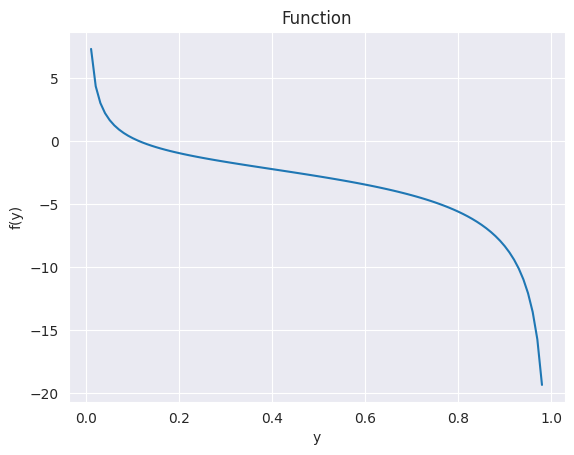

In [4]:
y1 = np.arange(0.01, 0.99, 0.01)
plt.plot(y1, f(y1))
plt.xlabel('y')
plt.ylabel('f(y)')
plt.title('Function')
plt.show()

Число итераций:
$$N \approx \frac{\log{\delta_0/\delta}}{\log{2}}$$

In [5]:
d_0 = 0.1
d = 1e-10

prec = int(-np.log10(d))
print(prec)

#число итераций
N = round(np.log10(d_0/d)/np.log10(2))
print(N)

#начальные границы отрезка
a = 0.1
b = 0.2

print(f(a)*f(b) < 0)

10
30
True


In [6]:
def dihotomy(func, a, b, N):
    f_a = func(a)
    f_b = func(b)
    for i in range(N):

        mid = (a + b)/2
        f_mid = func(mid)
    
        if (f_a*f_mid <= 0):
            b = mid
            f_b = func(b)
            
        elif (f_mid*f_b <= 0):
            a = mid
            f_a = f_mid        
        
        if (np.abs(f_a - 0) < d):
            root = a
            break
        if (np.abs(f_b - 0) < d):
            root = b
            break        
    
    root_dichotomy = (a+b)/2
    return root_dichotomy
    

In [7]:
print("%.10f" % dihotomy(f,a, b, N))


0.1119450257


In [27]:
def simple_iterations(func, deriv, prec, y):
    lmbd = 1/deriv(y)
    y_n_prev = y #n-1
    y_n = 0.11 #n

    y_s_iter = []
    counter_iter = 0


    while(np.abs(y_n - y_n_prev) > prec):
        tmp = y_n
        y_n = y_n_prev - lmbd*func(y_n_prev)
        y_n_prev = tmp
        y_s_iter.append(y_n)
        counter_iter += 1
    
    
    
    root_iter = y_n
    result = [root_iter, counter_iter]
    return result

0.1119450251
23


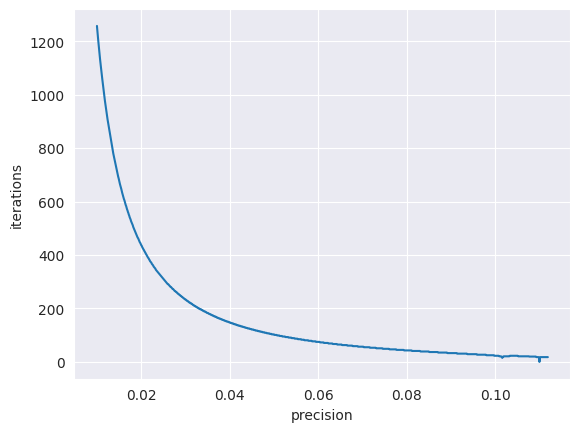

In [46]:
result = simple_iterations(f, f_der, 1e-10, 0.1)

print("%.10f" % result[0])
print(result[1])
count_of_iterations = []
begin_precisions = np.arange(0.01, dihotomy(f,a, b, N), 0.0001)
for item in begin_precisions:
    result = simple_iterations(f, f_der, 1e-10, item)
    count_of_iterations.append(result[1])

plt.plot(begin_precisions, count_of_iterations)
plt.xlabel('precision')
plt.ylabel('iterations')
plt.show()   

In [43]:
def newton(f, f_der, prec, y):
    y_n_prev = y #n-1
    y_n = 0.11#n


    y_s_Newton = [] 
    counter_Newton = 0

    while(np.abs(y_n - y_n_prev) > prec):
        tmp = y_n
        y_n = y_n_prev - f(y_n_prev)/f_der(y_n_prev)
        y_n_prev = tmp
        y_s_Newton.append(y_n)
        counter_Newton += 1
    
    

    
    
    root_Newton = y_n
    result = [root_Newton, counter_Newton]
    return result
    

0.1119450255
19


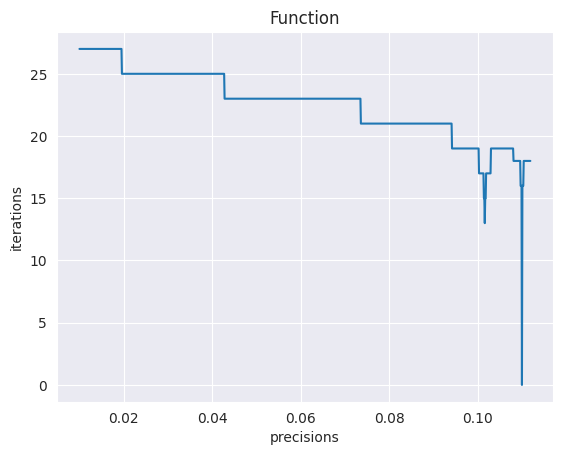

In [47]:
result = newton(f, f_der, 1e-10, 0.1)

print("%.10f" % result[0])
print(result[1])
count_of_iterations = []
begin_precisions = np.arange(0.01, dihotomy(f,a, b, N), 0.0001)
for item in begin_precisions:
    result = newton(f, f_der, 1e-10, item)
    count_of_iterations.append(result[1])

plt.plot(begin_precisions, count_of_iterations)
plt.xlabel('precisions')
plt.ylabel('iterations')
plt.title('Function')
plt.show()   
